## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Load The data and check the head
df =pd.read_csv('ab_data.csv')
df.head

<bound method NDFrame.head of         user_id                   timestamp      group landing_page  converted
0        851104  2017-01-21 22:11:48.556739    control     old_page          0
1        804228  2017-01-12 08:01:45.159739    control     old_page          0
2        661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3        853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4        864975  2017-01-21 01:52:26.210827    control     old_page          1
...         ...                         ...        ...          ...        ...
294473   751197  2017-01-03 22:28:38.630509    control     old_page          0
294474   945152  2017-01-12 00:51:57.078372    control     old_page          0
294475   734608  2017-01-22 11:45:03.439544    control     old_page          0
294476   697314  2017-01-15 01:20:28.957438    control     old_page          0
294477   715931  2017-01-16 12:40:24.467417  treatment     new_page          0

[294478 rows x 5 colu

b. Use the below cell to find the number of rows in the dataset.

In [3]:
#Check number of rows
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
#Check eunique users
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [5]:
#Proportion of converted users
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#Check how many times treatment and new_page don't lineup
no_lineup =df[(df['group'] == 'treatment') & (df['landing_page'] =='old_page')]
no_lineup2 =df[(df['group'] != 'treatment') & (df['landing_page'] =='new_page')]
print (no_lineup.count() + no_lineup2.count())

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64


f. Do any of the rows have missing values?

In [7]:
#Missing values check
print(df.isnull().sum())

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
#Filter the needed data from the rest, then make new data set that contains only the alined values of treatment with new page, and control with old page
treatment_np =df[(df['group'] == 'treatment') & (df['landing_page'] =='new_page')]
control_op =df[(df['group'] == 'control') & (df['landing_page'] =='old_page')]
df2 =pd.concat([treatment_np, control_op], keys=['control','treatment'], axis = 0)
df2.reset_index(drop=True)

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1
...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
#Check eunique users in df2
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
#Check repeated user_id 
print(df2[df2['user_id'].duplicated()]['user_id'].iloc[0])

773192


c. What is the row information for the repeat **user_id**? 

In [12]:
#Repeated user info
df2[df2.duplicated(subset =['user_id'], keep =False)]

user_id                   timestamp      group landing_page  \
control 1899   773192  2017-01-09 05:37:58.781806  treatment     new_page   
        2893   773192  2017-01-14 02:55:59.590927  treatment     new_page   

              converted  
control 1899          0  
        2893          0

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
#Keep only 1 of the repeated rows
df2 =df2.drop_duplicates(subset =['user_id'],keep ='first')

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
#probability of conversion
print (df2['converted'].mean())

0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
#probibility of control group converting
df2[(df2['group'] == 'control')]['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
#probibility of treatment group converting
df2[(df2['group'] == 'treatment')]['converted'].mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
#probibility of person getting new page
print (df2.replace({'new_page': 1, 'old_page': 0}, regex =False)['landing_page'].mean())

0.5000619442226688


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, not really. I don't think there are enough evidence to say that the treatment page leads to more conversions. Over all the numbers are low, and the probability of one receiving the new page is a 0.5 anyways. So I really can't say that the new page leads to more conversions no.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Our null hypothesis will be that the old page will prove to be the same or better than the new page, while the ulternitive hypothesis will be the new page proves to be the same or worse than the old page.

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
#We will asume that the new and old page are equal, so we'll find the proportion of conversions with that in mind
n_converted =df2['converted'].mean()
print(n_converted)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
#We will asume that the new and old page are equal, so we'll find the proportion of conversions with that in mind
o_converted =df2['converted'].mean()
print(o_converted)

0.11959708724499628


c. What is $n_{new}$?

In [20]:
#Users who got the new page
np_users =df2[(df2['group'] == 'treatment')]['user_id'].count()
print(np_users)

145310


d. What is $n_{old}$?

In [21]:
#Users who got the old page
op_users =df2[(df2['group'] == 'control')]['user_id'].count()
print(op_users)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
#Simulation
new_page_converted =np.random.binomial(1, n_converted, np_users)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
#Simulation
old_page_converted =np.random.binomial(1, o_converted, op_users)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
print(new_page_converted.mean() - old_page_converted.mean())

0.0007412937114400775


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
#10000 values similation
p_diffs = []
for _ in range(10000):
    new_page_converted =np.random.binomial(1, n_converted, np_users)
    old_page_converted =np.random.binomial(1, o_converted, op_users)
    diff =new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

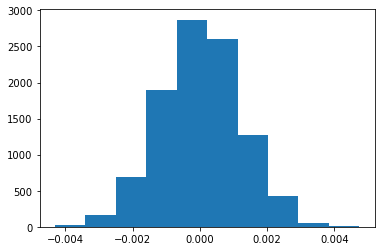

In [26]:
#Plotting a histogram
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
#Actual difference in csv file
csv_diff= (df2[df2['group'] =='treatment']['converted'].mean()) - (df2[df2['group'] =='control']['converted'].mean())
print (csv_diff)
#We convert the p_diffs then calculate the p-value
p_diffs =np.array(p_diffs)
print ((p_diffs > csv_diff).mean())

-0.0015782389853555567
0.9091


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The calculation in the print statement is called the P-Value   and it's 0.90, this is the probibility of getting the statistic we're checking or the other statistic  is more than the other in case of the null hypothesis is true. We also have p_diffs, that's the diffrence between the conversion rates between the old and new page. We also have csv_diff, that's the diffrence between the rates of old and new page in the dataset we used.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old =df2[(df2['landing_page'] == 'old_page') & (df2['converted'] ==1)].shape[0]
convert_new =df2[(df2['landing_page'] == 'new_page') & (df2['converted'] ==1)].shape[0]
n_old =df2[(df2['group'] == 'control')]['user_id'].count()
n_new =df2[(df2['group'] == 'treatment')]['user_id'].count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
#Use the built in to compute the statistic
z_score, p_value =sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print (f'Z_score is {z_score}\np_value is {p_value}')

Z_score is -1.3109241984234394
p_value is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Yes they do, they actually have similar values. However, the negative value means a fail of rejection for the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We'll be doing logistic regression.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
#Make the intercept column
df2['intercept']=1

In [31]:
#Make the dummies
ab_page =['treatment', 'control']
df2['ab_page'] =pd.get_dummies(df2['group'])['treatment']

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [32]:
#Make the model
model =sm.Logit(df2['converted'], df2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
#model summery
result =model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:               8.077e-06
Time:                        06:02:04   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value is 0.19. It's not the same as the one we calculated in the last part I think because the new column we added, and the model we picked for this calculation, as the logistic regression can only do 2 possibilities.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Hmm, this is actually a question I spent sometime thinking about. From my personal experience, I would say that it would be good if we can know the features of both the new and old page. What I mean is that we collect data about the features that are available in both pages. Since this is a new page, the user wouldn't convert if the page doesn't have all the features in the old page, and it's actually a good reason for them not to convert. However, the disadvantage here is that there is still the possibility of the user not converting for another reason. Having data about the feature is good but still doesn't cover everything.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [35]:
### Create the necessary dummy variables
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK','US']]
df_new.head
df_new['intercept'] =1
mod =sm.Logit(df_new['converted'], df_new[['UK', 'US', 'intercept', 'ab_page']])
result =mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:               2.323e-05
Time:                        06:02:06   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [36]:
#providing summery
df_new['US_new'] =df_new['US'] * df_new['ab_page']
df_new['UK_new'] =df_new['UK'] * df_new['ab_page']
mod =sm.Logit(df_new['converted'], df_new[['UK_new', 'US_new', 'intercept', 'ab_page']])
result =mod.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 08 Jan 2021   Pseudo R-squ.:               3.351e-05
Time:                        06:02:08   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.06785
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
UK_new         0.0901      0.040      2.225      0.026       0.011       0.169
US_new         0.0644      0.038      1.679      0.093      -0.011       0.140
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0827      0.038     -2.176      0.030      -0.157      -0.008
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions

The old page is better than the new one. With this result, we conclude to the fact that we failed to reject the null hypothesis. When we looked at the countries above, we found out that the UK p-value was 0.026 and the US p-value was 0.093. That means that the US users are more likely to convert.

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.